# **Libraries**

In [9]:
import os, pickle, itertools
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load data**

In [10]:
""" 
data[A][B][C]
    - A: model
        RNNSimple, GRU, LSTM
    - B: Threshold
        1 , 10, 100, 500, 1000
    - C: Values
        results, weights
        * results (10,5,7)
            10: folds 
            5: performance metrics (MSE, RMSE, MAE, MAPE, R2) 
            7: Maximum prediction horizon
        * weights  
"""

with open('./Results/Chengdu_Airport_China.pkl', 'rb') as f:
    data = pickle.load(f)   # RNNSimple, GRU, LSTM

# **Example**

In [11]:
data["RNNSimple"].keys()

dict_keys([1, 10, 100, 500, 1000])

In [12]:
results = data["RNNSimple"][1000]['results']

In [13]:
results.shape

(20, 5, 7)

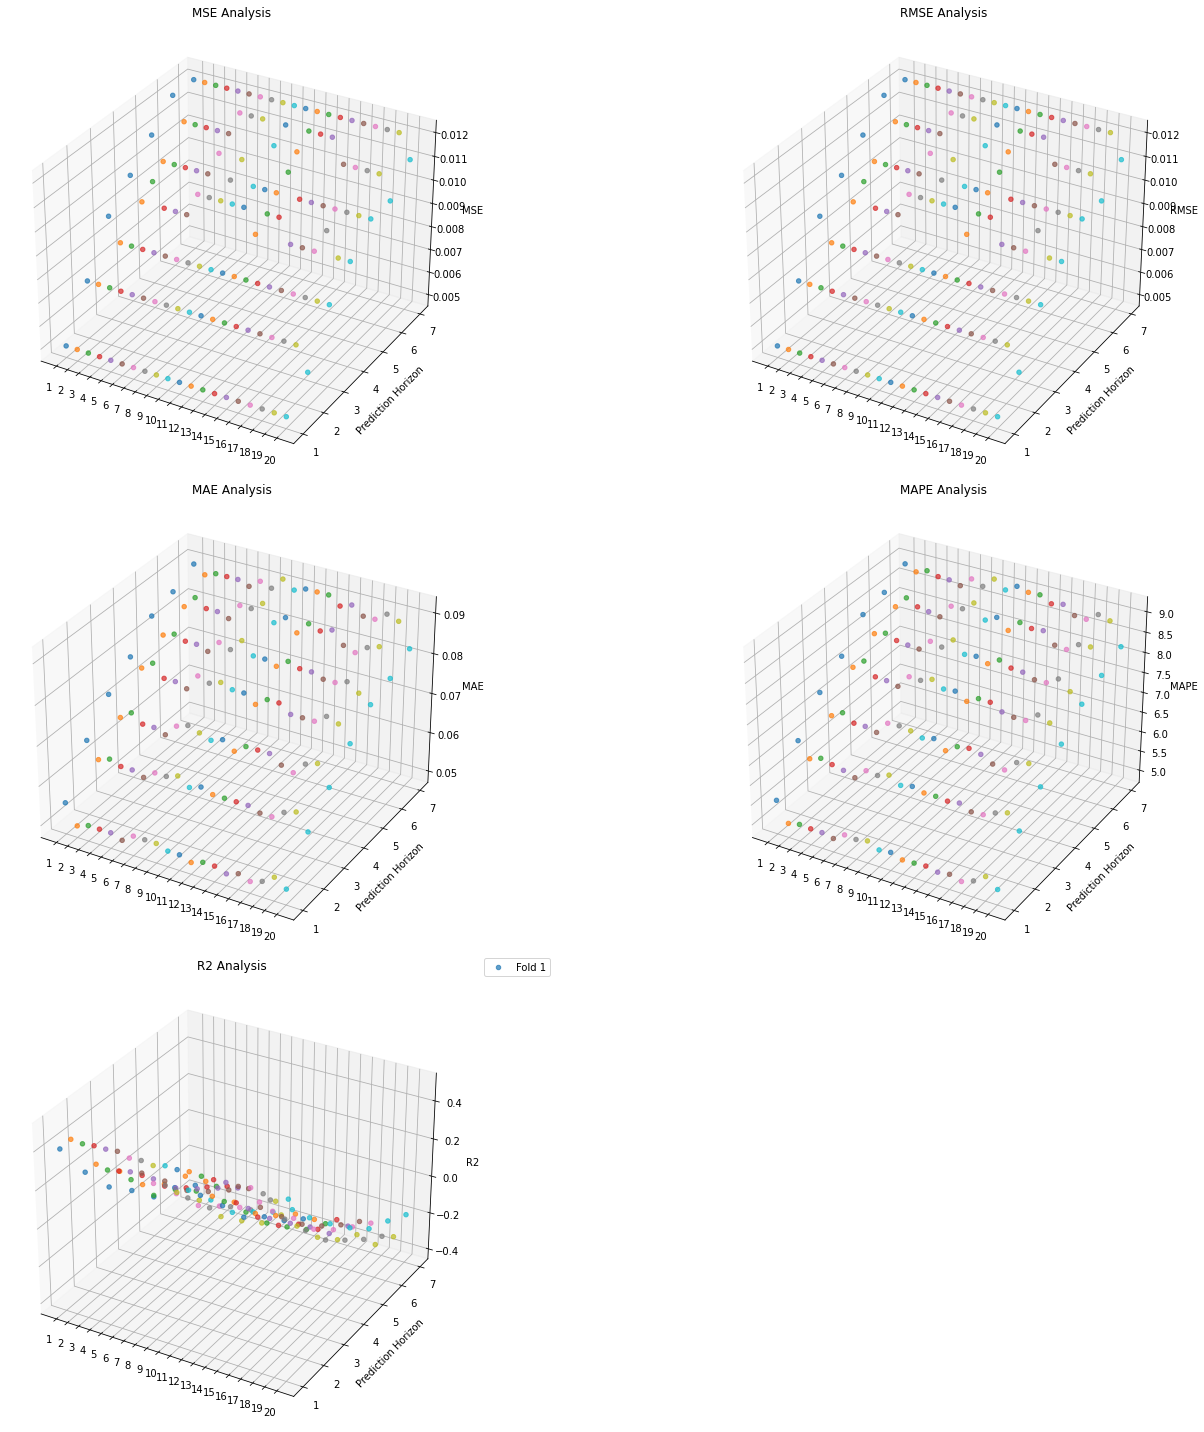

In [14]:
# Inicialización de listas para almacenar los resultados
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'R2']
horizons = [f'{i+1}' for i in range(results.shape[2])]

# Creación de un DataFrame para almacenar los resultados
dataDF = []
for fold in range(results.shape[0]):
    for metric_idx, metric in enumerate(metrics):
        for horizon_idx, horizon in enumerate(horizons):
            dataDF.append([fold, metric, horizon, results[fold, metric_idx, horizon_idx]])

df_results = pd.DataFrame(dataDF, columns=['Fold', 'Metric', 'Horizon', 'Value'])

# Dibujo de los resultados en 3D
fig = plt.figure(figsize=(20, 20))

for i, metric in enumerate(metrics):
    ax = fig.add_subplot(3, 2, i+1, projection='3d')
    
    for fold in range(results.shape[0]):
        ax.scatter(
            [fold+1] * results.shape[2], 
            list(range(1, results.shape[2]+1)), 
            results[fold, i, :], 
            label=f'Fold {fold+1}' if fold == 0 else "", 
            alpha=0.7
        )
    
    ax.set_title(f'{metric} Analysis')
    #ax.set_xlabel('Fold')
    ax.set_ylabel('Prediction Horizon')
    ax.set_zlabel(metric)
    ax.set_xticks(range(1, results.shape[0]+1))
    ax.set_yticks(range(1, results.shape[2]+1))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))
plt.tight_layout()
plt.show()

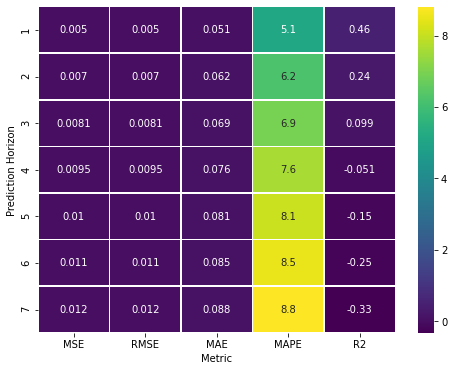

In [15]:
mean_results = np.mean(results, axis=0)
heatmap_data = {}

for metric_idx, metric in enumerate(metrics):
    heatmap_data[metric] = mean_results[metric_idx]

df_heatmap = pd.DataFrame(heatmap_data, index=horizons)

plt.figure(figsize=(8, 6))
sns.heatmap(df_heatmap, annot=True, cmap="viridis", linewidths=.5)
plt.xlabel('Metric')
plt.ylabel('Prediction Horizon')
plt.show()

# **All results**

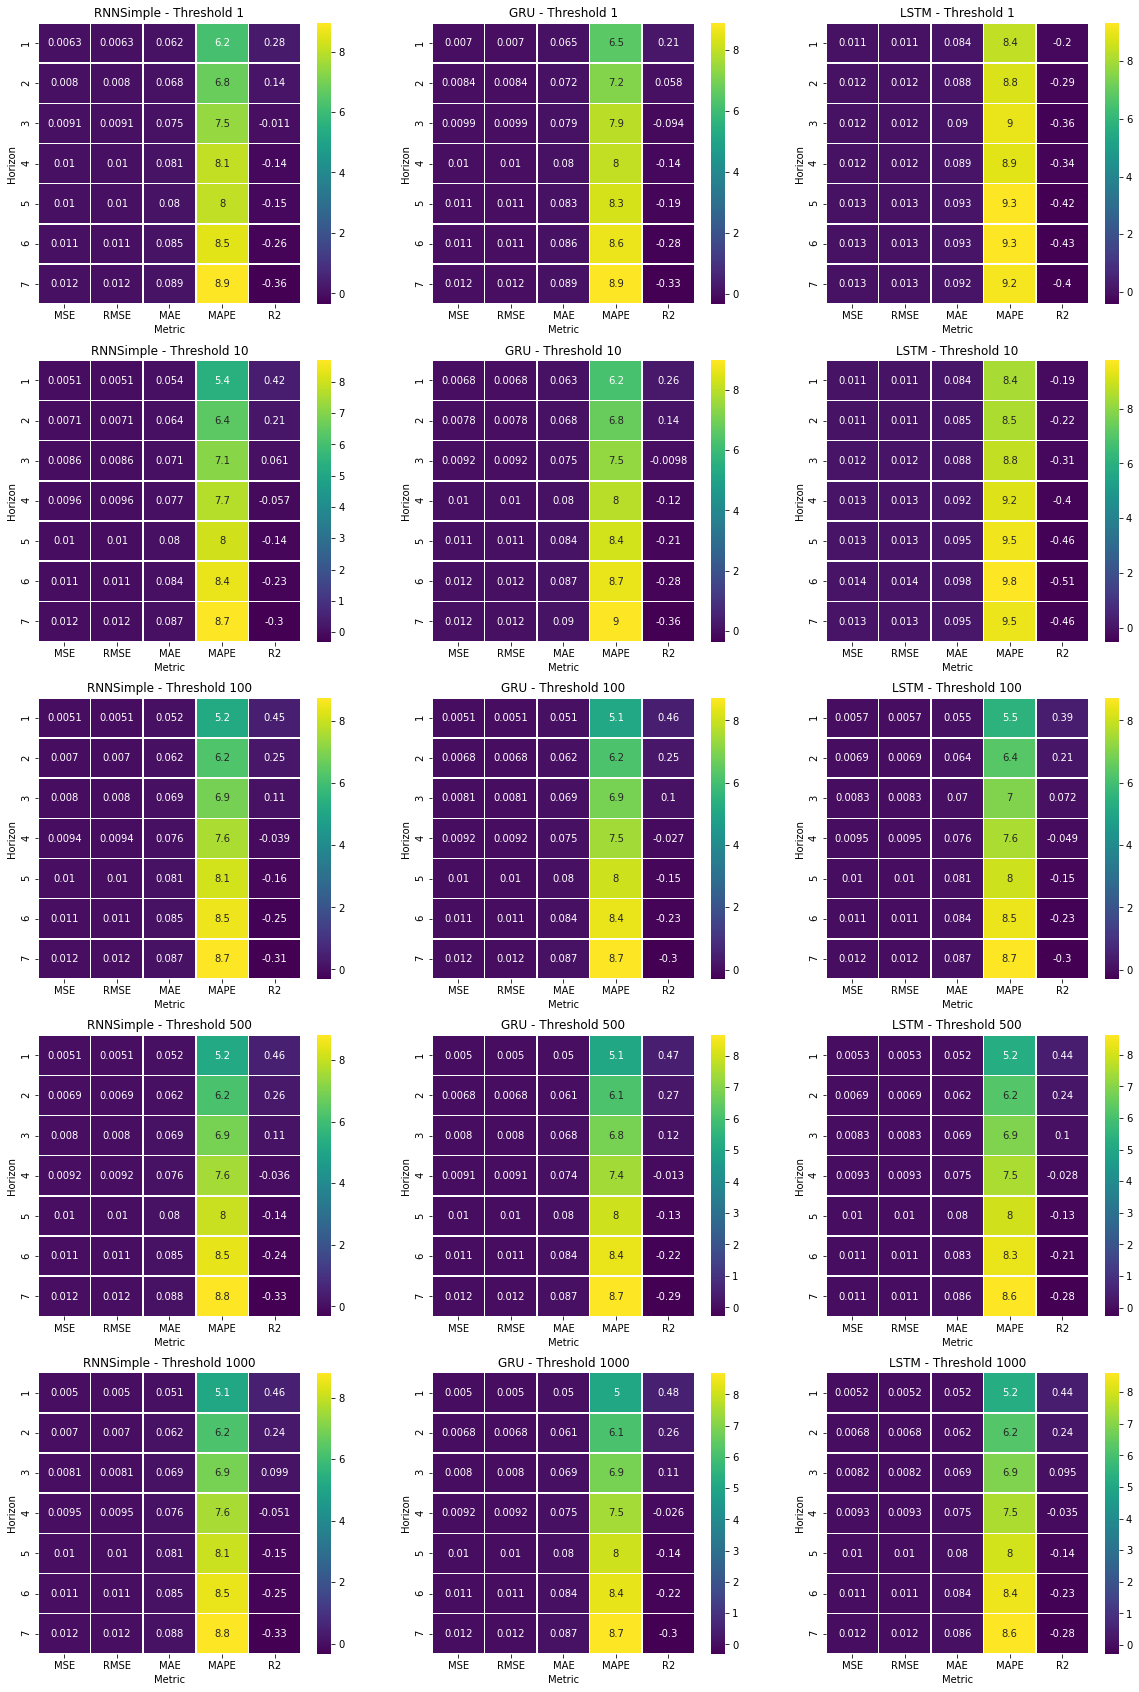

In [16]:
index = 1
n_models = len(data.keys())
n_thresholds = len(next(iter(data.values())).keys())

plt.figure(figsize=(20, 30))  
for threshold, model in itertools.product(data["RNNSimple"].keys(), data.keys()):
    
    #print(f"{model} {threshold}")

    threshold_results = data[model][threshold]['results']
    mean_results = np.mean(threshold_results, axis=0)

    heatmap_data = {}
    for metric_idx, metric in enumerate(metrics):
        heatmap_data[metric] = mean_results[metric_idx]
    
    # creation of data frame for heapmap
    df_heatmap = pd.DataFrame(heatmap_data, index=horizons)

    plt.subplot(n_thresholds, n_models, index)
    sns.heatmap(df_heatmap, annot=True, cmap="viridis", linewidths=.5)
    plt.xlabel('Metric')
    plt.ylabel('Horizon')
    plt.title(f'{model} - Threshold {threshold}')
    
    index += 1